In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
columns = ['Age', 'Workclass','FNLWGT','Edu','Edu_num','Marital_Status','Occupation','Relationship','Race','Sex','Cap_Gain','Cap_Loss','Hours/wk','Native_Country','Income'] 
df= pd.read_csv('/Users/yuwenyu/Desktop/Data_Mining/project/census-income.data.csv',sep=' *, *',names=columns, na_values='?')
df
df=df.dropna()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [63]:
df_test=pd.read_csv('/Users/yuwenyu/Desktop/Data_Mining/project/census-income.test.csv',sep=' *, *',names=columns,na_values='?')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [64]:
#Income Spread
print(df['Income'].value_counts(normalize=True)*100)
print(df_test['Income'].value_counts(normalize=True)*100)

0    75.107751
1    24.892249
Name: Income, dtype: float64
<=50K.    76.377372
>50K.     23.622628
Name: Income, dtype: float64


In [10]:
#confirm no more missing values in both train and test data after dropping na
for col in df.columns:
    print(col,':', df[df[col] == ' ?'][col].count())

Age : 0
Workclass : 0
FNLWGT : 0
Edu : 0
Edu_num : 0
Marital_Status : 0
Occupation : 0
Relationship : 0
Race : 0
Sex : 0
Cap_Gain : 0
Cap_Loss : 0
Hours/wk : 0
Native_Country : 0
Income : 0


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [11]:
for col in df_test.columns:
    print(col,':', df_test[df_test[col] == ' ?'][col].count())

Age : 0
Workclass : 0
FNLWGT : 0
Edu : 0
Edu_num : 0
Marital_Status : 0
Occupation : 0
Relationship : 0
Race : 0
Sex : 0
Cap_Gain : 0
Cap_Loss : 0
Hours/wk : 0
Native_Country : 0
Income : 0


In [12]:
df['Occupation'].describe()

count              30162
unique                14
top       Prof-specialty
freq                4038
Name: Occupation, dtype: object

In [13]:
df['Workclass'].describe()

count       30162
unique          7
top       Private
freq        22286
Name: Workclass, dtype: object

In [14]:
df['Native_Country'].describe()

count             30162
unique               41
top       United-States
freq              27504
Name: Native_Country, dtype: object

In [15]:
df['Income'].describe()

count     30162
unique        2
top       <=50K
freq      22654
Name: Income, dtype: object

In [ ]:
#visualizations of data spreads for each feature

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Workclass'], hue=df['Income'])

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['Edu'],hue=df['Income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Marital_Status'], hue=df['Income']);

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['Occupation'], hue=df['Income']);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Relationship'], hue=df['Income']);

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Race'], hue=df['Income']);

In [ ]:
sns.countplot(df['Sex'], hue=df['Income']);

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['Native_Country']);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='viridis');

In [ ]:
#consolidating data spreads to fewer categories

In [21]:
#Age: Separated into 4 bins: 0-20, 20-40, 40-60, and 60+
df['Age'] = pd.to_numeric(df['Age'])
df['Age'] = pd.cut(df['Age'], 
                   bins = [0, 20, 40, 60, 100], 
                   labels = ['Young', 'Early-Middle', 'Late-Middle','Old'])

In [22]:
# Hours/wk: Separated by 0-20: part time 21-45: full time 46+ as over time
df['Hours/wk'] = pd.cut(df['Hours/wk'], 
                                   bins = [0, 20, 45, 100], 
                                   labels = ['Part-Time', 'Full-Time', 'Over-Time'])

In [23]:
#Capital Delta: We created Capital Delta using the formula formula: Cap Gains - Cap. Losses
df['Cap_Delta'] = df['Cap_Gain'] - df['Cap_Loss']

In [24]:
#Native Country: 91 percent of ‘Native Country’ was the US,so the feature was made into two categories: ‘US and ‘Not Native to US’. 
countries = np.array(df['Native_Country'].unique())
countries = np.delete(countries, 0)
df['Native_Country'].replace(countries, 'Other', inplace = True)



In [25]:
# Marital_Status:combine ‘Divorced’,’separated’, ‘Married-spouse-absent’ and ‘Widowed’ into ‘Separated’, and combine Married-AF-spouse into ‘Married’
df['Marital_Status'].replace(['Divorced','Widowed','Separated','Married-spouse-absent'],'separated', inplace = True)
df['Marital_Status'].replace(['Married-AF-spouse','Married-civ-spouse'],'married', inplace = True)
df['Marital_Status'].unique()

array(['Never-married', 'married', 'separated'], dtype=object)

In [26]:
# race 
df['Race'].replace(['Black','Asian-Pac-Islander','Amer-Indian-Eskimo'],'Other', inplace = True)

In [27]:
#Education
df['Edu'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             'Grade School', inplace = True)
df['Edu'].replace(['Assoc-voc','Assoc-acdm'],
                             'Associates', inplace = True)

In [28]:
#workclass
df['Workclass'].replace(['State-gov','Federal-gov','Local-gov'],'gov', inplace = True)

In [29]:
#dropping columns
df.drop(['Occupation','FNLWGT','Edu_num', 'Cap_Gain', 'Cap_Loss', 'Relationship'], axis=1, inplace=True)

In [31]:
#feature selection
print(df.columns)

Index(['Age', 'Workclass', 'Edu', 'Marital_Status', 'Race', 'Sex', 'Hours/wk',
       'Native_Country', 'Income', 'Cap_Delta'],
      dtype='object')


In [ ]:
df.to_csv('/Users/brendanmcshane/Desktop/Data Mining | Fall 2020/project.test.processed.csv')

In [ ]:
#Build Model

In [ ]:
#Endocing categorical data

In [32]:
# Check feature types
numeric_variable=[]
categorical_variable=[]

for column in df.columns:
    if df[column].dtype == 'int':
        numeric_variable.append(column)
    else:
        categorical_variable.append(column)
        
print('numeric_variable',numeric_variable,'categorical_variable',categorical_variable)

numeric_variable ['Cap_Delta'] categorical_variable ['Age', 'Workclass', 'Edu', 'Marital_Status', 'Race', 'Sex', 'Hours/wk', 'Native_Country', 'Income']


In [33]:
# EncodeCategorical
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#encoding ordinal variables
enc = OrdinalEncoder()
enc.fit(df[["Age", "Edu", 'Hours/wk']])
df[["Age","Edu",'Hours/wk']] = enc.transform(df[["Age","Edu",'Hours/wk']])

In [34]:
#encoding nominal valraibles
df["Workclass"] = pd.get_dummies(df,columns=["Workclass"])
df["Marital_Status"] = pd.get_dummies(df,columns=["Marital_Status"])
df["Race"] = pd.get_dummies(df,columns=["Race"])
df["Sex"] = pd.get_dummies(df,columns=["Sex"])
df["Native_Country"] = pd.get_dummies(df,columns=["Native_Country"])

In [35]:
#encoding target 
labelencoder = LabelEncoder()
df['Income'] = labelencoder.fit_transform(df['Income'])

In [42]:
for col in df.columns:
    if col != 'Cap_Delta':
        print(df[col].unique())

[0. 1. 3. 2.]
[0.0 1.0 3.0 2.0]
[1. 4. 3. 5. 7. 0. 2. 6.]
[0.0 1.0 3.0 2.0]
[0.0 1.0 3.0 2.0]
[0.0 1.0 3.0 2.0]
[0. 2. 1.]
[0.0 1.0 3.0 2.0]
[0 1]


In [37]:
#Select X and Y
features=['Age', 'Workclass','Edu','Marital_Status','Race', 'Sex','Hours/wk', 'Native_Country','Cap_Delta']

In [ ]:
# processing test dataset

In [65]:
#age
df_test['Age'] = pd.to_numeric(df_test['Age'])
df_test['Age'] = pd.cut(df_test['Age'], 
                   bins = [0, 20, 40, 60, 100], 
                   labels = ['Young', 'Early-Middle', 'Late-Middle','Old'])

In [67]:
# hors/wk
df_test['Hours/wk'] = pd.cut(df_test['Hours/wk'], 
                                   bins = [0, 20, 45, 100], 
                                   labels = ['Part-Time', 'Full-Time', 'Over-Time'])

In [68]:
#Cap_Delta
df_test['Cap_Delta'] = df_test['Cap_Gain'] - df_test['Cap_Loss']

In [69]:
#countries
countries = np.array(df_test['Native_Country'].unique())
countries = np.delete(countries, 0)
df_test['Native_Country'].replace(countries, 'Other', inplace = True)

In [70]:
#Marital_Status
df_test['Marital_Status'].replace(['Divorced','Widowed','Separated','Married-spouse-absent'],'separated', inplace = True)
df_test['Marital_Status'].replace(['Married-AF-spouse','Married-civ-spouse'],'married', inplace = True)

In [71]:
#Race
df_test['Race'].replace(['Black','Asian-Pac-Islander','Amer-Indian-Eskimo'],'Other', inplace = True)

In [72]:
#Edu
df_test['Edu'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             'Grade School', inplace = True)
df_test['Edu'].replace(['Assoc-voc','Assoc-acdm'],
                             'Associates', inplace = True)

In [73]:
#Workclass
df_test['Workclass'].replace(['State-gov','Federal-gov','Local-gov'],'gov', inplace = True)

In [74]:
df_test.drop(['Occupation','FNLWGT','Edu_num', 'Cap_Gain', 'Cap_Loss', 'Relationship'], axis=1, inplace=True)

In [75]:
#encoding ordinal variables
enc = OrdinalEncoder()
enc.fit(df_test[["Age", "Edu", 'Hours/wk']])
df_test[["Age","Edu",'Hours/wk']] = enc.transform(df_test[["Age","Edu",'Hours/wk']])

In [76]:
#encoding nominal valraibles
df_test["Workclass"] = pd.get_dummies(df_test,columns=["Workclass"])
df_test["Marital_Status"] = pd.get_dummies(df_test,columns=["Marital_Status"])
df_test["Race"] = pd.get_dummies(df_test,columns=["Race"])
df_test["Sex"] = pd.get_dummies(df_test,columns=["Sex"])
df_test["Native_Country"] = pd.get_dummies(df_test,columns=["Native_Country"])

In [77]:
df_test['Income'] = labelencoder.fit_transform(df_test['Income'])

In [78]:
x_train=df[(features)]
y_train=df['Income']

In [79]:
x_test=df_test[(features)]
y_test=df_test['Income']

In [80]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(30162, 9) (30162,) (16281, 9) (16281,)


In [81]:
#Build Model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import VotingClassifier

In [83]:
#Standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_log=scaler.fit_transform(x_train)
x_test_log=scaler.fit_transform(x_test)

In [97]:
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

The accuracy of the Logistic Regression is 0.8
              precision    recall  f1-score   support

       <=50K       0.80      0.99      0.88     12435
        >50K       0.90      0.18      0.30      3846

    accuracy                           0.80     16281
   macro avg       0.85      0.59      0.59     16281
weighted avg       0.82      0.80      0.75     16281



Text(0.5, 1.0, 'Logistic')

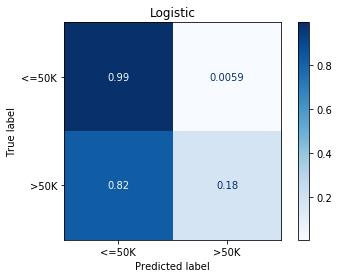

In [101]:
# Logistic Regression
Logistic = LogisticRegressionCV(cv=10, penalty='l2').fit(X_train_log, y_train)
print('The accuracy of the Logistic Regression is', round(Logistic.score(x_test_log,y_test),2))

y_pred=Logistic.predict(x_test_log)
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

plot_cm=plot_confusion_matrix(Logistic,x_test_log,y_test,display_labels=target_names, cmap=plt.cm.Blues,normalize='true') 
plot_cm.ax_.set_title('Logistic') 

The accuracy of the Random Forest Model is 0.84
              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90     12435
        >50K       0.78      0.44      0.57      3846

    accuracy                           0.84     16281
   macro avg       0.81      0.70      0.73     16281
weighted avg       0.83      0.84      0.82     16281



Text(0.5, 1.0, 'randomforest')

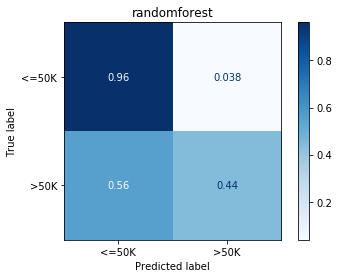

In [106]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
score_randomforest = randomforest.score(x_test,y_test)
print('The accuracy of the Random Forest Model is', round(score_randomforest,2))

y_pred = randomforest.predict(x_test)
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

plot_cm=plot_confusion_matrix(randomforest,x_test,y_test,display_labels=target_names, cmap=plt.cm.Blues,normalize='true') 
plot_cm.ax_.set_title('randomforest')

The accuracy of the KNN Model is 0.8
              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88     12435
        >50K       0.61      0.43      0.50      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.67      0.69     16281
weighted avg       0.78      0.80      0.79     16281



Text(0.5, 1.0, 'knn')

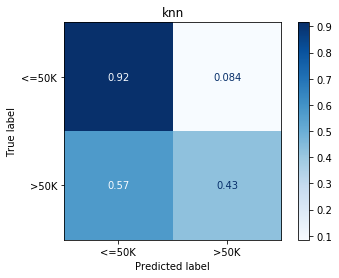

In [124]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_log, y_train)
score_knn = knn.score(x_test_log,y_test)
print('The accuracy of the KNN Model is',round(score_knn,2))

y_pred = knn.predict(x_test_log)
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

plot_cm=plot_confusion_matrix(knn,x_test_log,y_test,display_labels=target_names, cmap=plt.cm.Blues,normalize='true') 
plot_cm.ax_.set_title('knn')

The accuracy of Gaussian Naive Bayes is 0.8
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88     12435
        >50K       0.72      0.26      0.38      3846

    accuracy                           0.80     16281
   macro avg       0.76      0.61      0.63     16281
weighted avg       0.79      0.80      0.76     16281



Text(0.5, 1.0, 'gaussian')

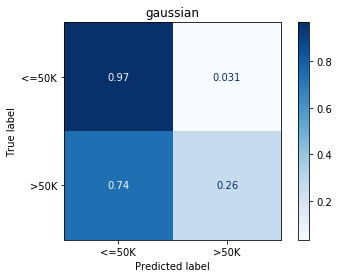

In [125]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
score_gaussian = gaussian.score(x_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', round(score_gaussian,2))

y_pred = gaussian.predict(x_test)
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

plot_cm=plot_confusion_matrix(gaussian,x_test,y_test,display_labels=target_names, cmap=plt.cm.Blues,normalize='true') 
plot_cm.ax_.set_title('gaussian')

The accuracy of ensemble model2 is 0.83
              precision    recall  f1-score   support

       <=50K       0.82      1.00      0.90     12435
        >50K       0.95      0.30      0.45      3846

    accuracy                           0.83     16281
   macro avg       0.88      0.65      0.68     16281
weighted avg       0.85      0.83      0.79     16281



Text(0.5, 1.0, 'ensemble with soft voting')

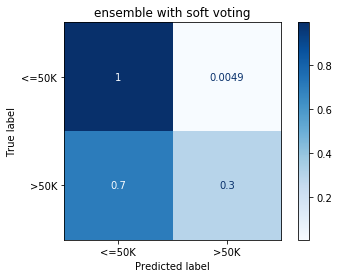

In [127]:
eclf2 = VotingClassifier(estimators=[('lr', Logistic), ('rf', randomforest), ('knn', knn), ('gnb', gaussian)],voting='soft',flatten_transform=True)
eclf2 = eclf2.fit(x_train, y_train)
score_eclf2 = eclf2.score(x_test,y_test)
print('The accuracy of ensemble model2 is', round(score_eclf2,2))

y_pred = eclf2.predict(x_test)
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

plot_cm=plot_confusion_matrix(eclf2,x_test,y_test,display_labels=target_names, cmap=plt.cm.Blues,normalize='true') 
plot_cm.ax_.set_title('ensemble with soft voting')


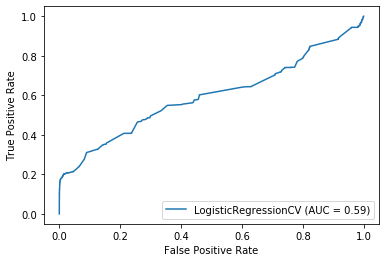

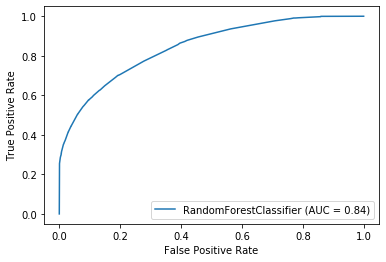

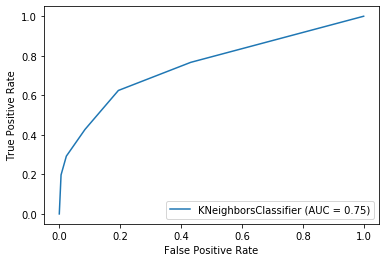

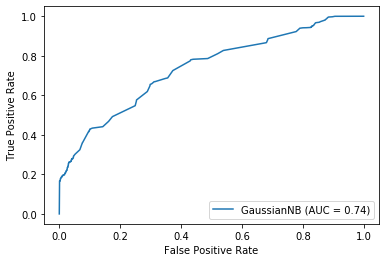

In [142]:
#AUC plot
Logistic_plt=metrics.plot_roc_curve(Logistic, x_test_log, y_test)
rf_plt=metrics.plot_roc_curve(randomforest, x_test, y_test)
knn_plt=metrics.plot_roc_curve(knn, x_test_log,  y_test) 
nb_plt=metrics.plot_roc_curve(gaussian, x_test,  y_test) 

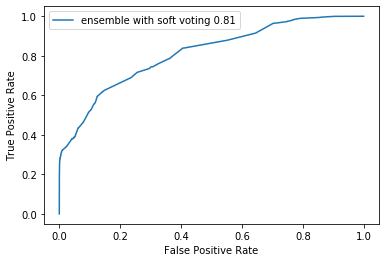

In [143]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

# predict probabilities
pre_probs = eclf2.predict_proba(x_test)
pre_prob = pre_probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, pre_prob)
AUC=round(auc(fpr, tpr),2)

plt.plot(fpr, tpr, marker='', label='ensemble with soft voting '+str(AUC))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()